# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('demo_updated.csv')
df.drop(columns= ['Unnamed: 0'],inplace = True)

In [3]:
X = df
X = X.drop('mau', axis = 1)
y = df[['mau']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [5]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

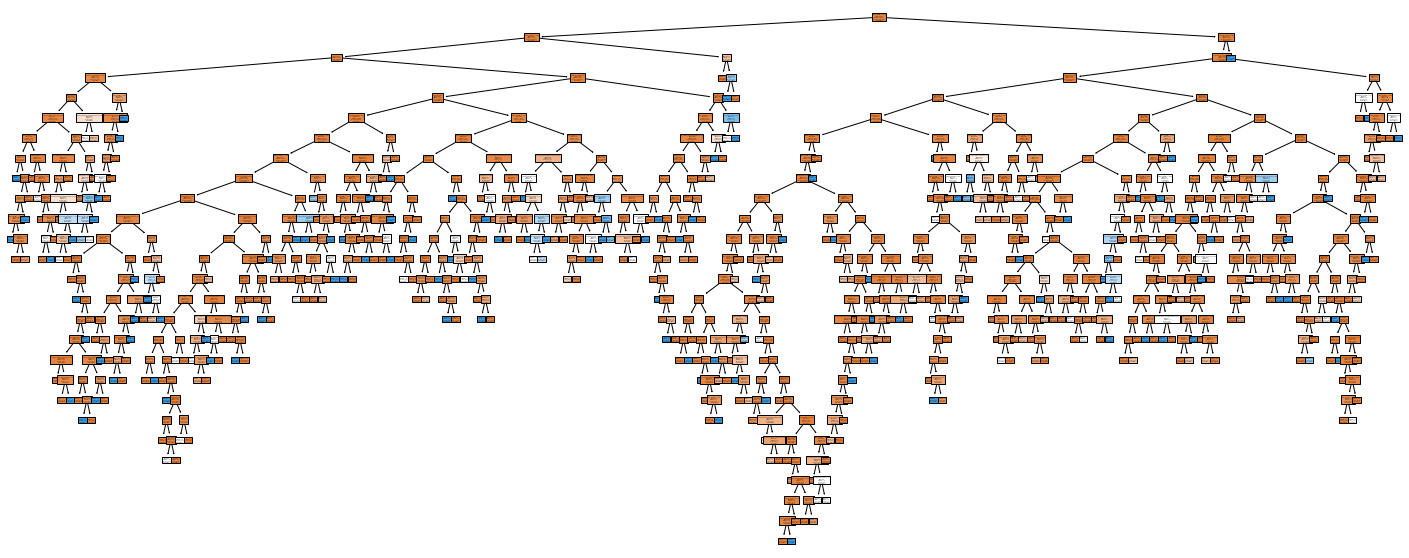

In [6]:
plt.figure(figsize=(25,10))
plot_tree(clf,
         filled=True,
         class_names=['Mau', 'Bom'],
         feature_names=X.columns);

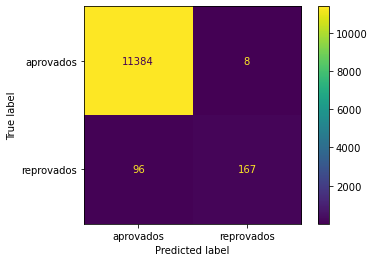

In [7]:
plot_confusion_matrix(clf, X_train, y_train, display_labels=['aprovados', 'reprovados']);

In [8]:
predict = clf.predict(X_train)
accuracy_score(y_train, predict)

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [9]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_test, y_test)

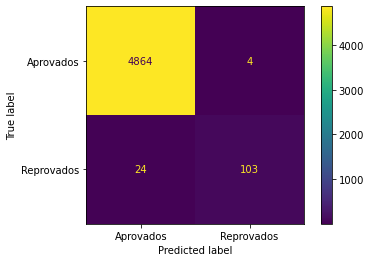

In [10]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Aprovados','Reprovados'])

#### A acurácia da base de teste apresentou uma performance melhor do que a base de treino

In [11]:
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9943943943943944

In [12]:
clf = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 5, random_state= 123)
clf = clf.fit(X_test, y_test)

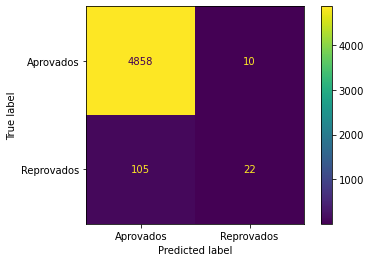

In [14]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Aprovados', 'Reprovados'])

In [15]:
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9769769769769769

#### A proporção de proponentes que foram classificados como maus ficou ≅ 0,44/100 (0,44%).

In [16]:
22*100/len(y_test)

0.44044044044044045

#### Ao classificar todos os contratos como bons, a acurácia atinge 100% tanto na base de treino quanto na base de teste.

In [17]:
X = df.drop(['mau'], axis = 1)
y = y*1
y = y.replace({1:0})

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [19]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train, y_train)

In [20]:
predict = clf.predict(X_train)
accuracy_score(y_train, predict)

1.0

In [21]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_test, y_test)

In [22]:
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

1.0